# IBM HR Employee Attrition

### Exploratory Data Analysis

In [1]:
import pandas as pd
pd.options.display.max_rows=10
pd.options.display.max_columns=50
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import chart_studio.plotly as py
%matplotlib inline

In [2]:
df=pd.read_csv('data.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [3]:
df.head()

Age Attrition     BusinessTravel  DailyRate              Department  \
0   41       Yes      Travel_Rarely       1102                   Sales   
1   49        No  Travel_Frequently        279  Research & Development   
2   37       Yes      Travel_Rarely       1373  Research & Development   
3   33        No  Travel_Frequently       1392  Research & Development   
4   27        No      Travel_Rarely        591  Research & Development   

   DistanceFromHome  Education EducationField  EmployeeCount  EmployeeNumber  \
0                 1          2  Life Sciences              1               1   
1                 8          1  Life Sciences              1               2   
2                 2          2          Other              1               4   
3                 3          4  Life Sciences              1               5   
4                 2          1        Medical              1               7   

   EnvironmentSatisfaction  Gender  HourlyRate  JobInvolvement  JobLevel  \
0                        2  Female          94               3         2   
1                        3    Male          61               2         2   
2                        4    Male          92               2         1   
3                        4  Female          56               3         1   
4                        1    Male          40               3         1   

                 JobRole  JobSatisfaction MaritalStatus  MonthlyIncome  \
0        Sales Executive                4        Single           5993   
1     Research Scientist                2       Married           5130   
2  Laboratory Technician                3        Single           2090   
3     Research Scientist                3       Married           2909   
4  Laboratory Technician                2       Married           3468   

   MonthlyRate  NumCompaniesWorked Over18 OverTime  PercentSalaryHike  \
0        19479                   8      Y      Yes                 11   
1        24907                   1      Y       No                 23   
2         2396                   6      Y      Yes                 15   
3        23159                   1      Y      Yes                 11   
4        16632                   9      Y       No                 12   

   PerformanceRating  RelationshipSatisfaction  StandardHours  \
0                  3                         1             80   
1                  4                         4             80   
2                  3                         2             80   
3                  3                         3             80   
4                  3                         4             80   

   StockOptionLevel  TotalWorkingYears  TrainingTimesLastYear  \
0                 0                  8                      0   
1                 1                 10                      3   
2                 0                  7                      3   
3                 0                  8                      3   
4                 1                  6                      3   

   WorkLifeBalance  YearsAtCompany  YearsInCurrentRole  \
0                1               6                   4   
1                3              10                   7   
2                3               0                   0   
3                3               8                   7   
4                3               2                   2   

   YearsSinceLastPromotion  YearsWithCurrManager  
0                        0                     5  
1                        1                     7  
2                        0                     0  
3                        3                     0  
4                        2                     2

In [4]:
df.describe()

Age    DailyRate  DistanceFromHome    Education  EmployeeCount  \
count  1470.000000  1470.000000       1470.000000  1470.000000         1470.0   
mean     36.923810   802.485714          9.192517     2.912925            1.0   
std       9.135373   403.509100          8.106864     1.024165            0.0   
min      18.000000   102.000000          1.000000     1.000000            1.0   
25%      30.000000   465.000000          2.000000     2.000000            1.0   
50%      36.000000   802.000000          7.000000     3.000000            1.0   
75%      43.000000  1157.000000         14.000000     4.000000            1.0   
max      60.000000  1499.000000         29.000000     5.000000            1.0   

       EmployeeNumber  EnvironmentSatisfaction   HourlyRate  JobInvolvement  \
count     1470.000000              1470.000000  1470.000000     1470.000000   
mean      1024.865306                 2.721769    65.891156        2.729932   
std        602.024335                 1.093082    20.329428        0.711561   
min          1.000000                 1.000000    30.000000        1.000000   
25%        491.250000                 2.000000    48.000000        2.000000   
50%       1020.500000                 3.000000    66.000000        3.000000   
75%       1555.750000                 4.000000    83.750000        3.000000   
max       2068.000000                 4.000000   100.000000        4.000000   

          JobLevel  JobSatisfaction  MonthlyIncome   MonthlyRate  \
count  1470.000000      1470.000000    1470.000000   1470.000000   
mean      2.063946         2.728571    6502.931293  14313.103401   
std       1.106940         1.102846    4707.956783   7117.786044   
min       1.000000         1.000000    1009.000000   2094.000000   
25%       1.000000         2.000000    2911.000000   8047.000000   
50%       2.000000         3.000000    4919.000000  14235.500000   
75%       3.000000         4.000000    8379.000000  20461.500000   
max       5.000000         4.000000   19999.000000  26999.000000   

       NumCompaniesWorked  PercentSalaryHike  PerformanceRating  \
count         1470.000000        1470.000000        1470.000000   
mean             2.693197          15.209524           3.153741   
std              2.498009           3.659938           0.360824   
min              0.000000          11.000000           3.000000   
25%              1.000000          12.000000           3.000000   
50%              2.000000          14.000000           3.000000   
75%              4.000000          18.000000           3.000000   
max              9.000000          25.000000           4.000000   

       RelationshipSatisfaction  StandardHours  StockOptionLevel  \
count               1470.000000         1470.0       1470.000000   
mean                   2.712245           80.0          0.793878   
std                    1.081209            0.0          0.852077   
min                    1.000000           80.0          0.000000   
25%                    2.000000           80.0          0.000000   
50%                    3.000000           80.0          1.000000   
75%                    4.000000           80.0          1.000000   
max                    4.000000           80.0          3.000000   

       TotalWorkingYears  TrainingTimesLastYear  WorkLifeBalance  \
count        1470.000000            1470.000000      1470.000000   
mean           11.279592               2.799320         2.761224   
std             7.780782               1.289271         0.706476   
min             0.000000               0.000000         1.000000   
25%             6.000000               2.000000         2.000000   
50%            10.000000               3.000000         3.000000   
75%            15.000000               3.000000         3.000000   
max            40.000000               6.000000         4.000000   

       YearsAtCompany  YearsInCurrentRole  YearsSinceLastPromotion  \
count     1470.000000         1470.000000              1470.

### Standard hours makes no sense because it is the same for all rows as well as over Y

<AxesSubplot:xlabel='Age', ylabel='Density'>

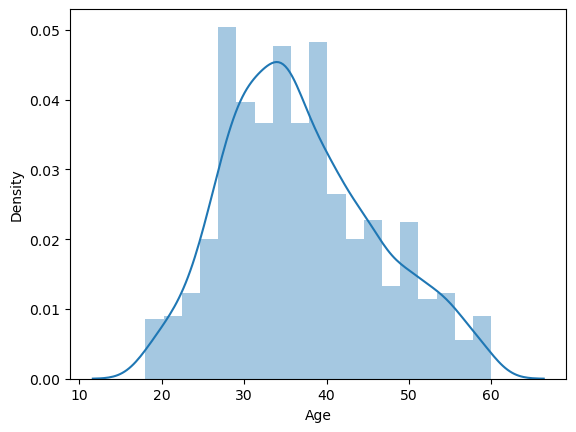

In [5]:
#plt.hist(df['Age'])
sns.distplot(df['Age'])

The age group of IBM employees in this data set is concentrated between 25-45 years

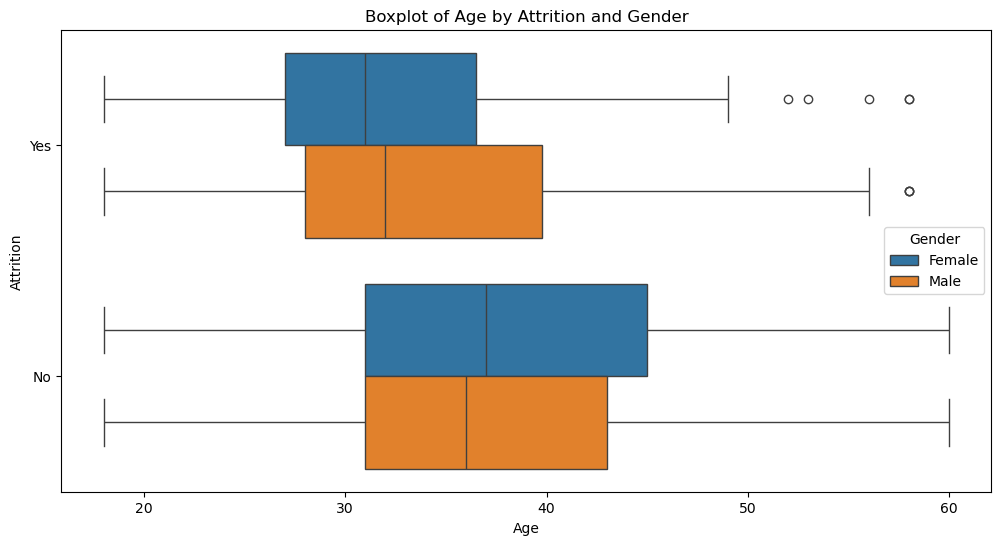

In [6]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Attrition', hue='Gender', data=df)
plt.title('Boxplot of Age by Attrition and Gender')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

Attrition is more common in the younger age groups and it is more likely with females
As Expected it is more coomon amongst single Employees

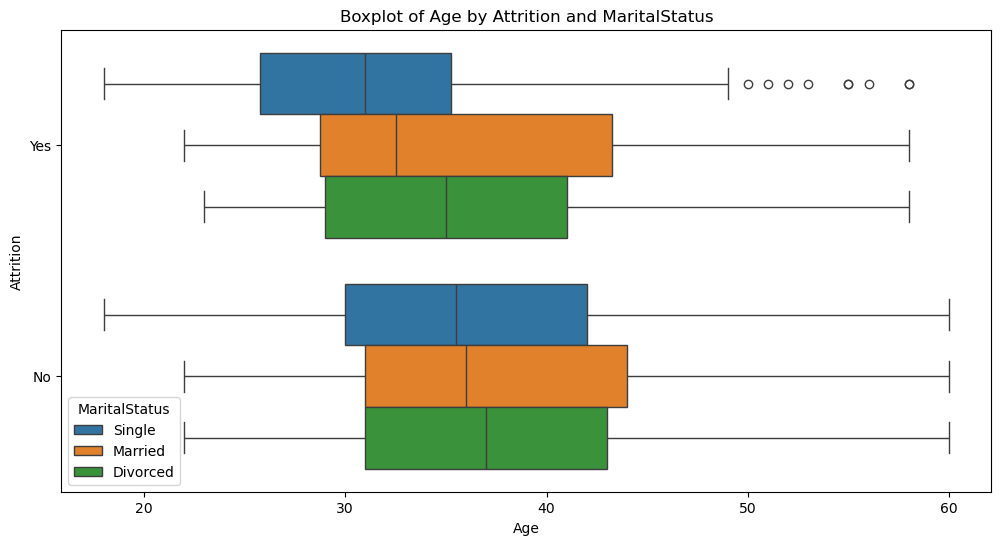

In [7]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Attrition', hue='MaritalStatus', data=df)
plt.title('Boxplot of Age by Attrition and MaritalStatus')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

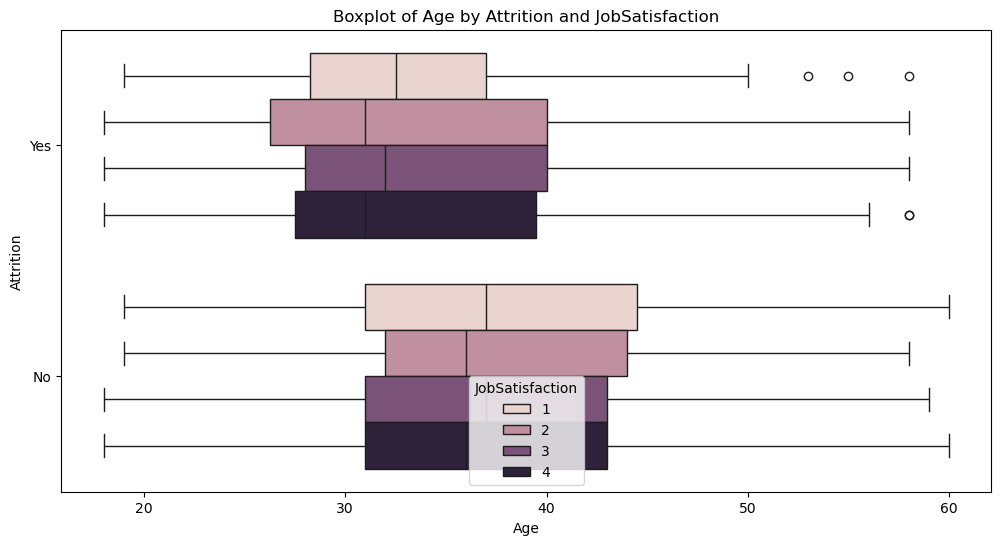

In [8]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Attrition', hue='JobSatisfaction', data=df)
plt.title('Boxplot of Age by Attrition and JobSatisfaction')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

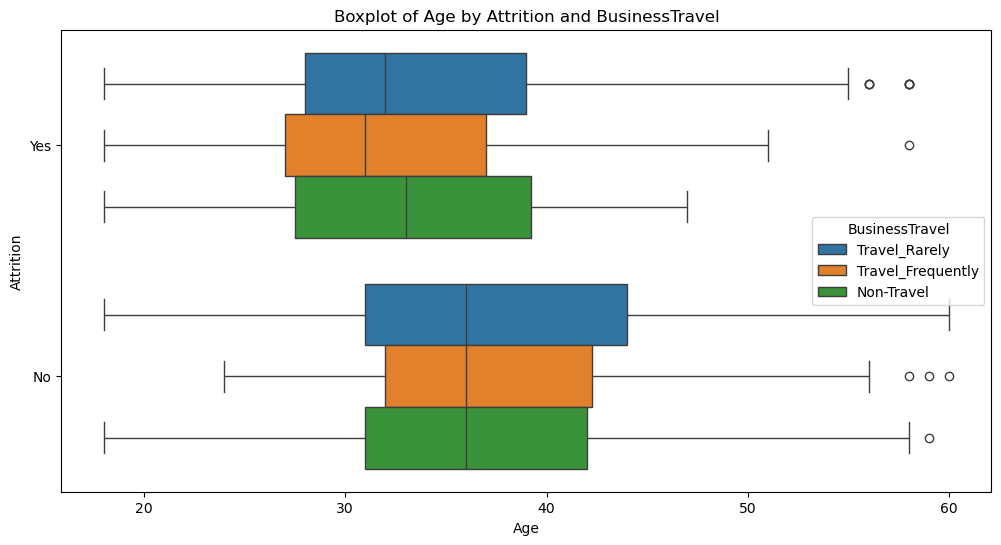

In [9]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Attrition', hue='BusinessTravel', data=df)
plt.title('Boxplot of Age by Attrition and BusinessTravel')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

People who leave the company get lower opportunities to travel the company

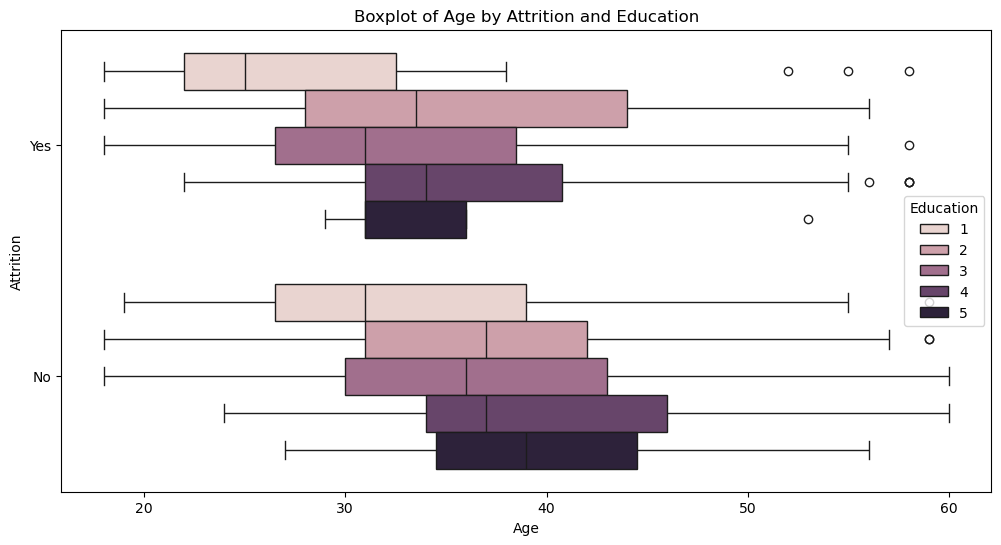

In [10]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='Age', y='Attrition', hue='Education', data=df)
plt.title('Boxplot of Age by Attrition and Education')
plt.xlabel('Age')
plt.ylabel('Attrition')
plt.show()

People Having very high education tend to leave the company less

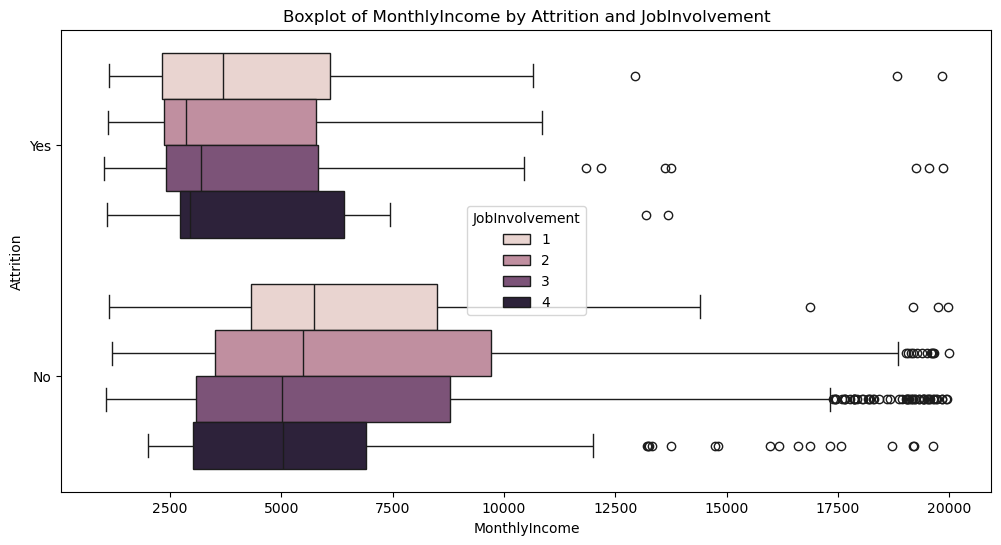

In [11]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthlyIncome', y='Attrition', hue='JobInvolvement', data=df)
plt.title('Boxplot of MonthlyIncome by Attrition and JobInvolvement')
plt.xlabel('MonthlyIncome')
plt.ylabel('Attrition')
plt.show()

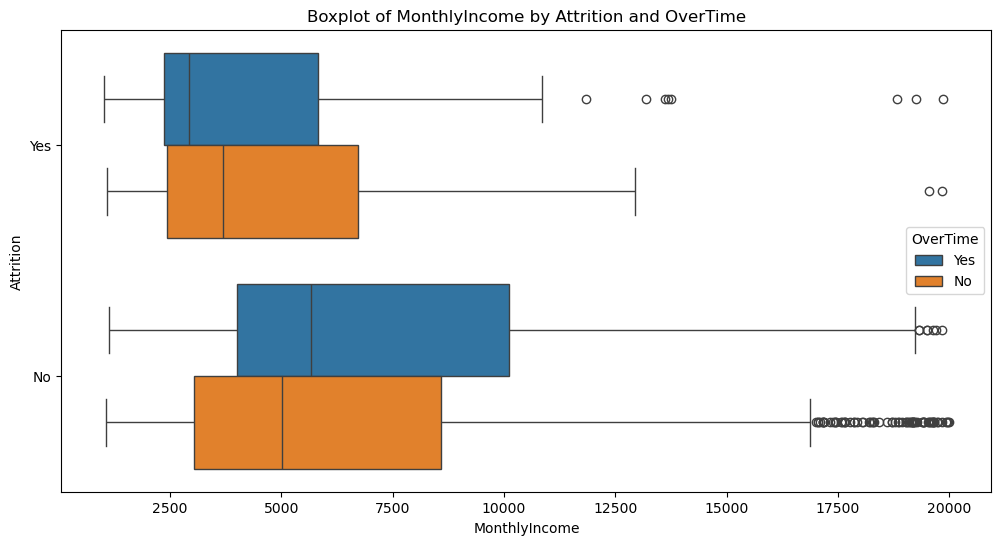

In [12]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthlyIncome', y='Attrition', hue='OverTime', data=df)
plt.title('Boxplot of MonthlyIncome by Attrition and OverTime')
plt.xlabel('MonthlyIncome')
plt.ylabel('Attrition')
plt.show()

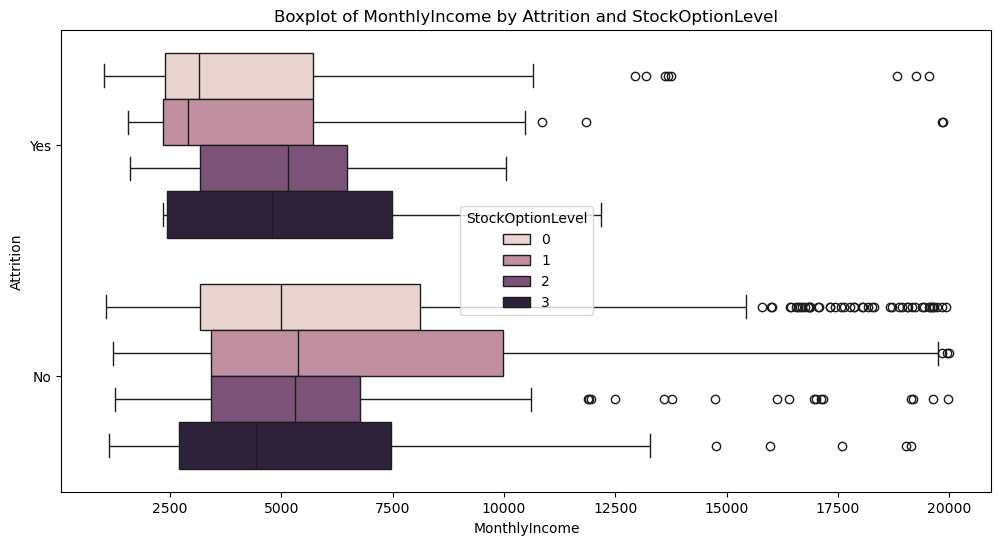

In [13]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='MonthlyIncome', y='Attrition', hue='StockOptionLevel', data=df)
plt.title('Boxplot of MonthlyIncome by Attrition and StockOptionLevel')
plt.xlabel('MonthlyIncome')
plt.ylabel('Attrition')
plt.show()

<AxesSubplot:xlabel='MonthlyIncome', ylabel='Density'>

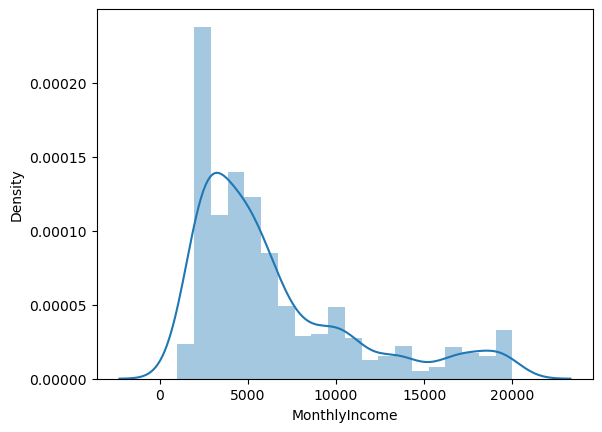

In [14]:
sns.distplot(df['MonthlyIncome'])

<AxesSubplot:xlabel='MonthlyRate', ylabel='Density'>

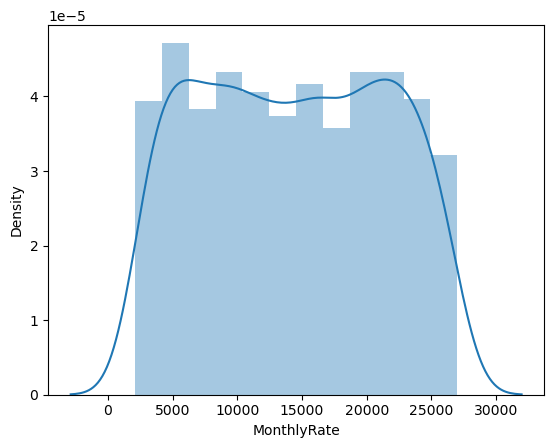

In [15]:
sns.distplot(df['MonthlyRate'])

<AxesSubplot:xlabel='HourlyRate', ylabel='Density'>

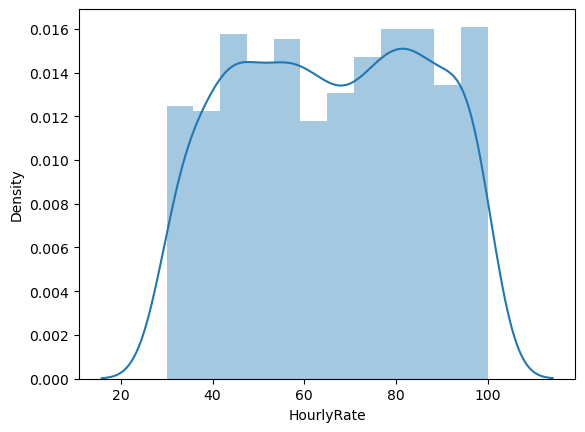

In [16]:
sns.distplot(df['HourlyRate'])

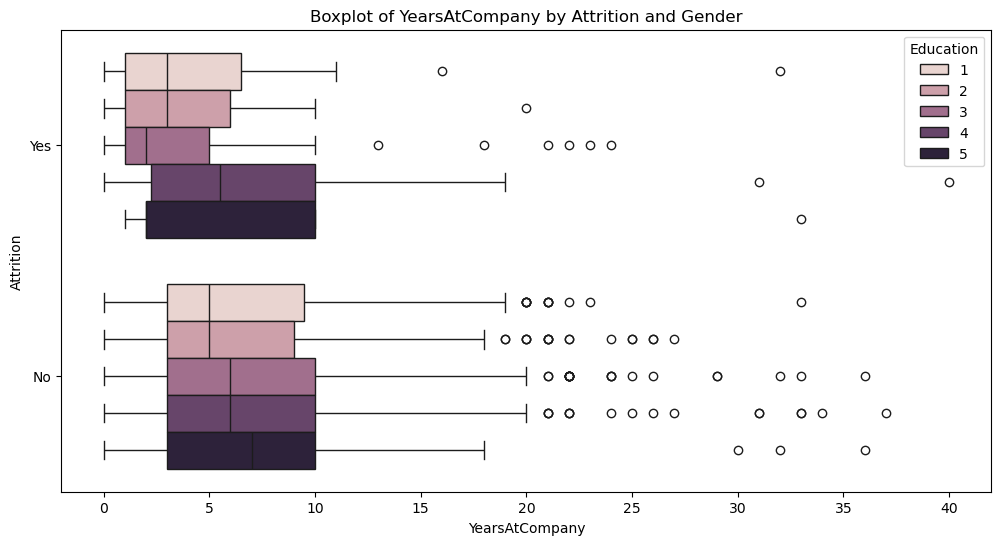

In [17]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='YearsAtCompany', y='Attrition', hue='Education', data=df)
plt.title('Boxplot of YearsAtCompany by Attrition and Gender')
plt.xlabel('YearsAtCompany')
plt.ylabel('Attrition')
plt.show()

In [18]:
data_n=df[['Age','DailyRate','HourlyRate','MonthlyIncome','MonthlyRate','PercentSalaryHike','TotalWorkingYears','YearsAtCompany','YearsInCurrentRole','YearsSinceLastPromotion','YearsWithCurrManager','NumCompaniesWorked']]

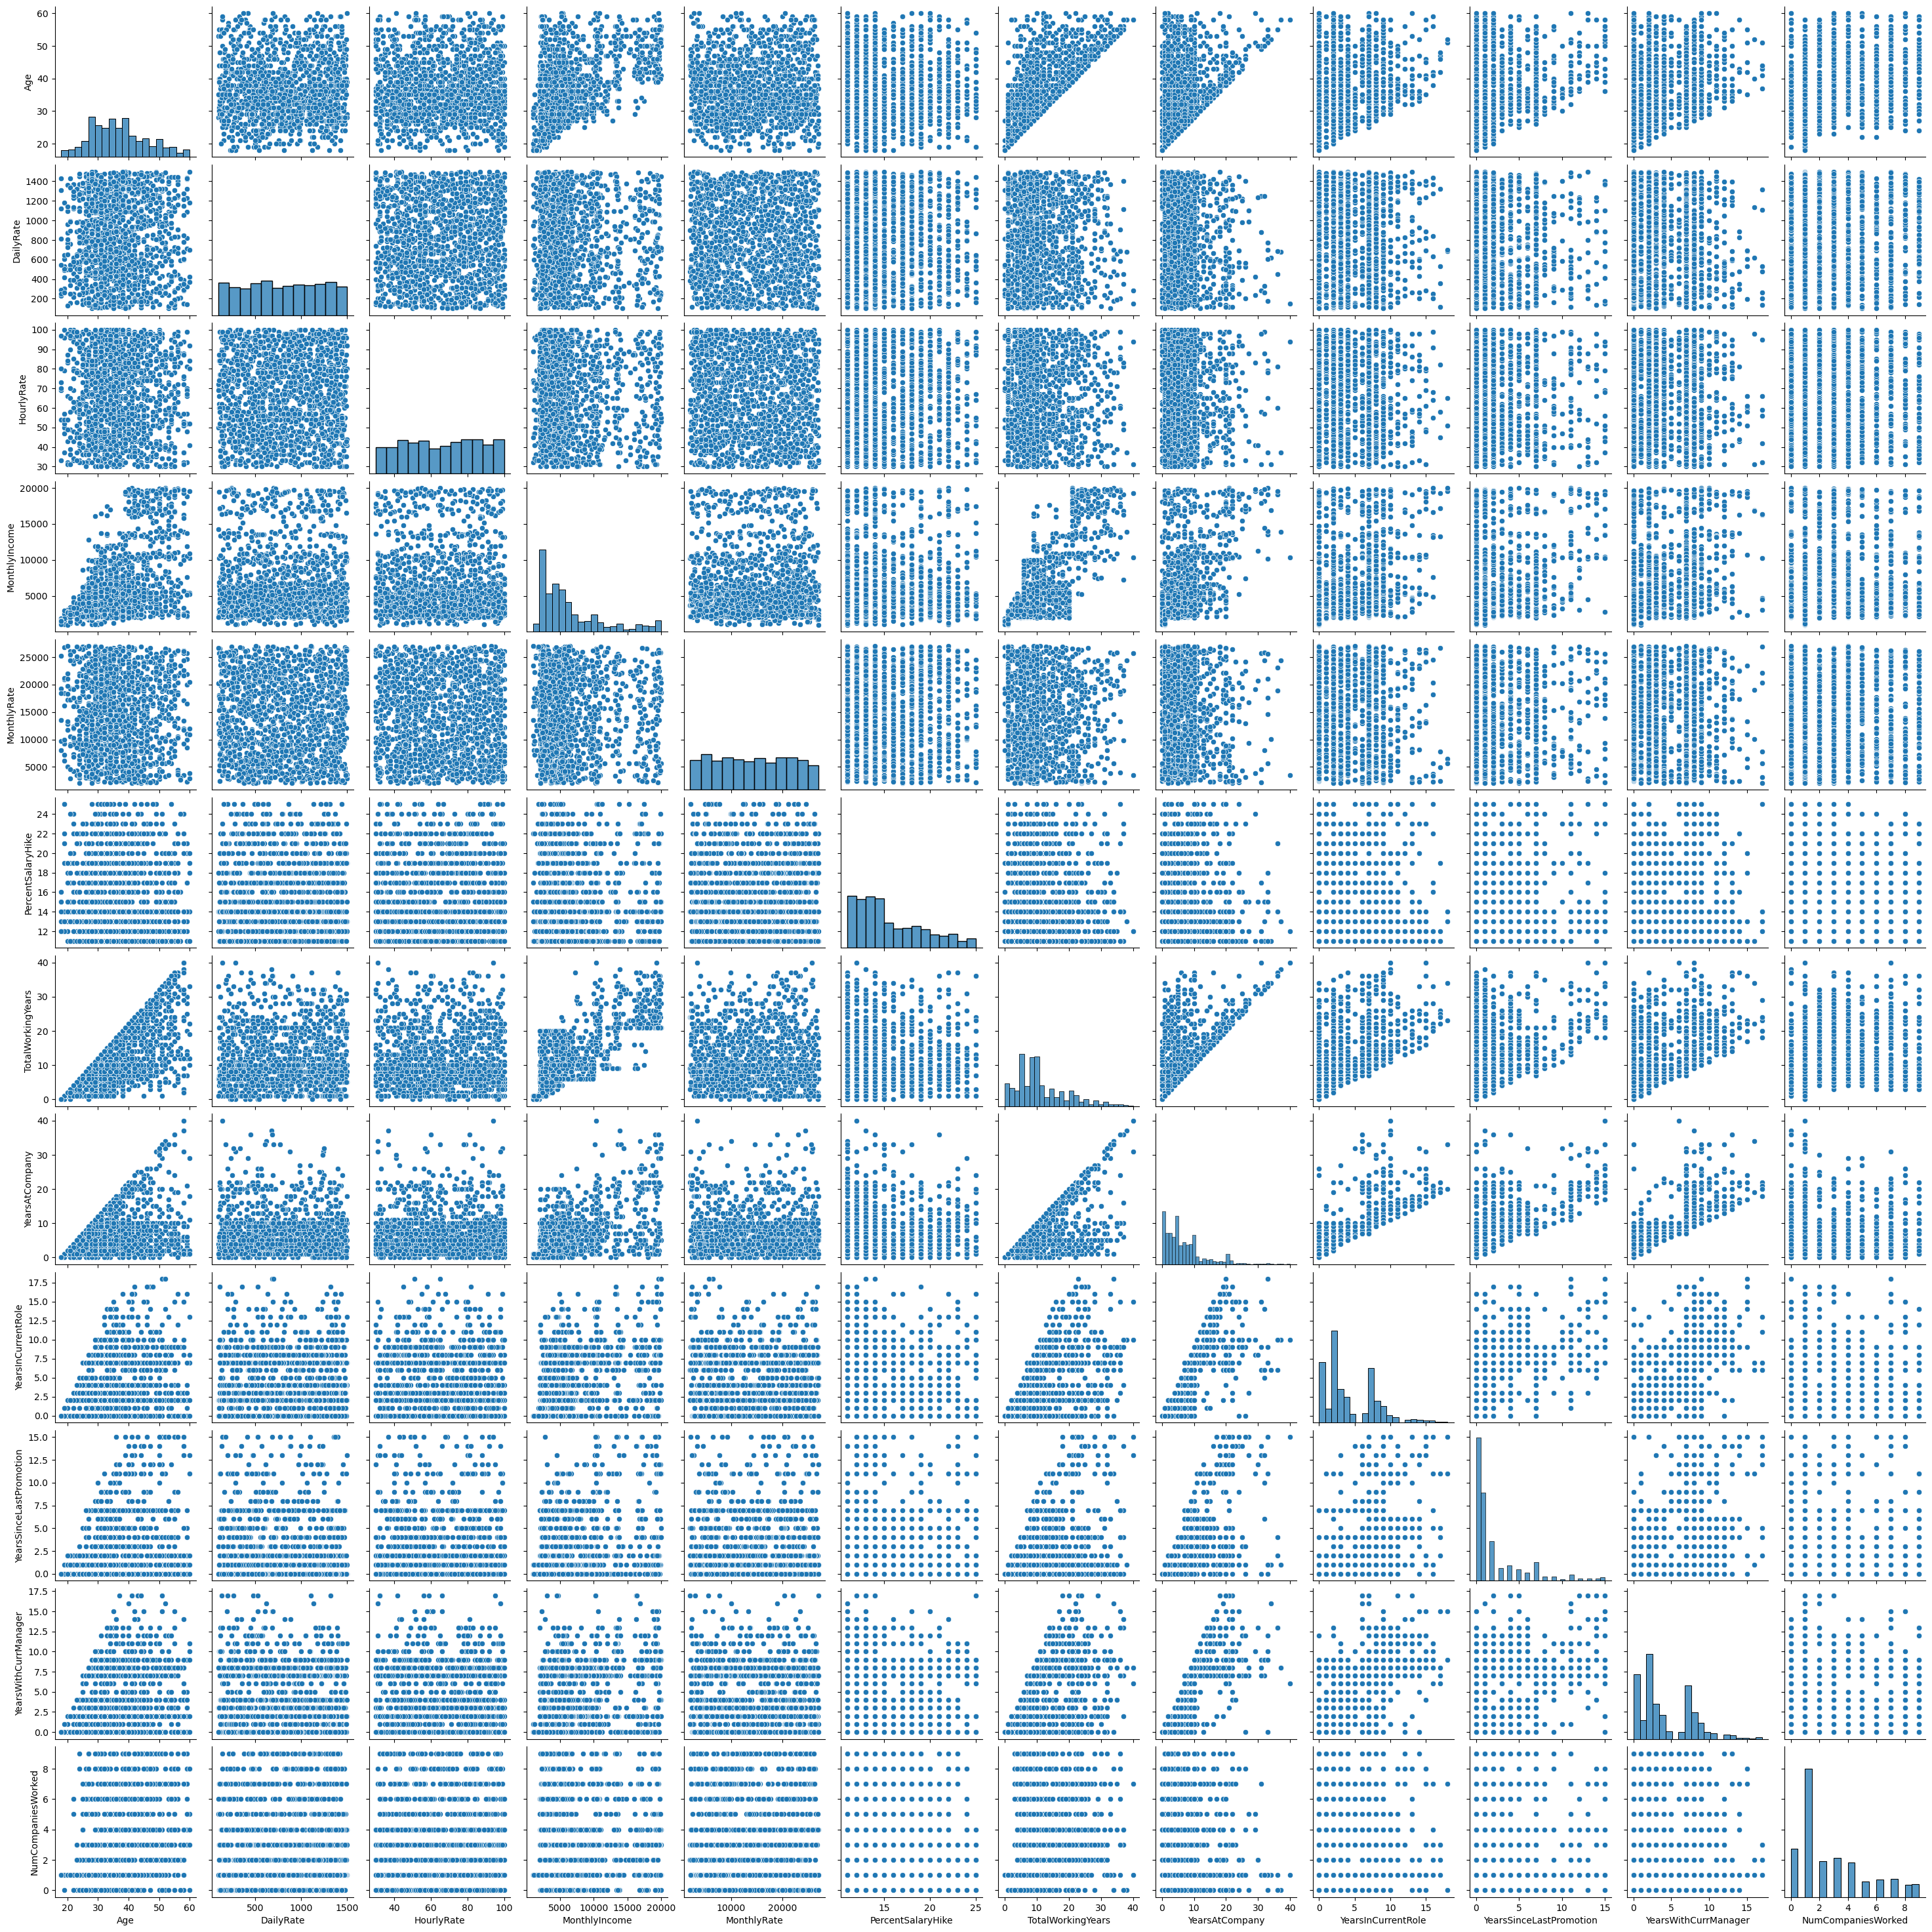

In [19]:
sns.pairplot(data_n)

<AxesSubplot:title={'center':'Pearson Correlation of Features'}>

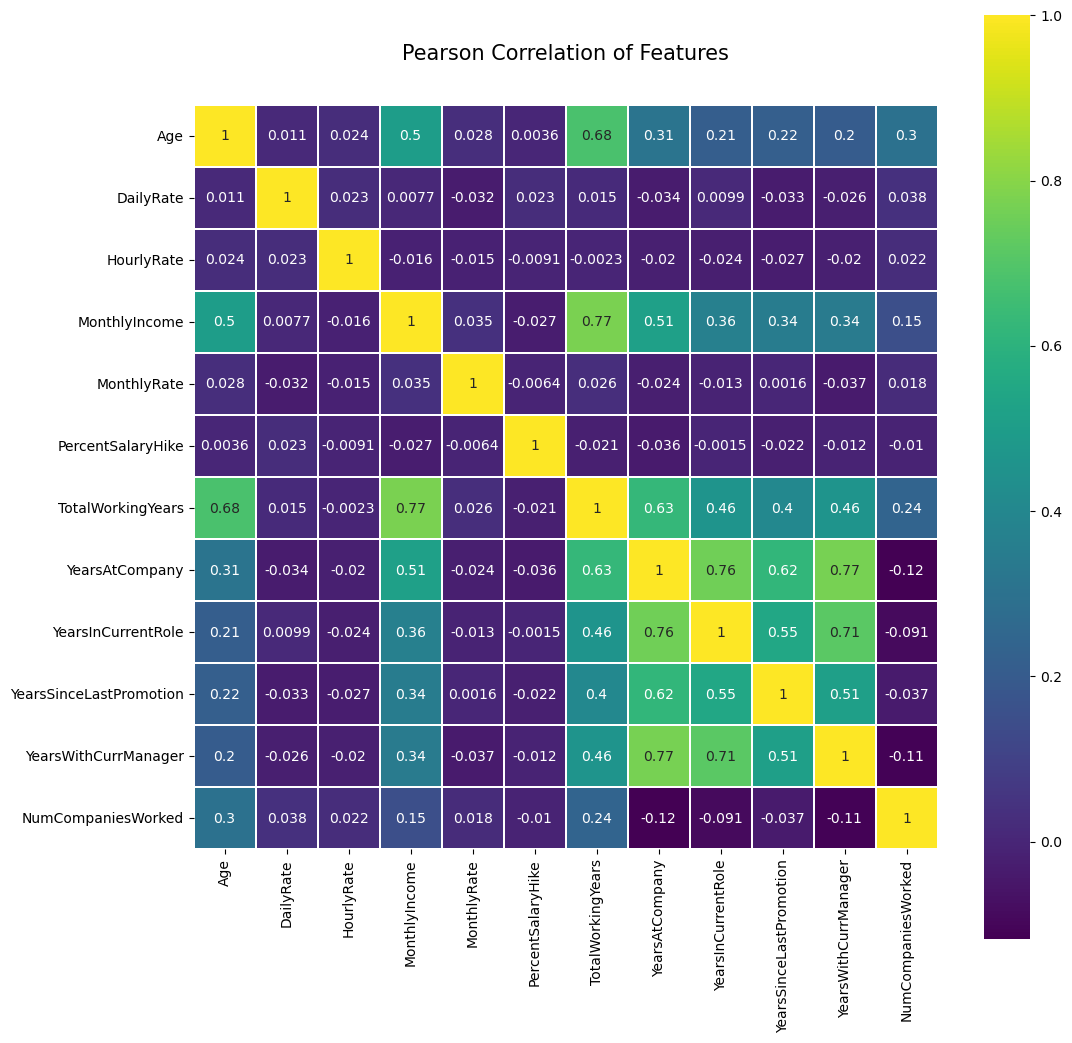

In [20]:
colormap = plt.cm.viridis
plt.figure(figsize=(12,12))
plt.title('Pearson Correlation of Features', y=1.05, size=15)
sns.heatmap(data_n.corr(),linewidths=0.1,vmax=1.0, square=True, cmap=colormap, linecolor='white', annot=True)